In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_rec_salary_17-18')

In [3]:
tes.dtypes

NAME         object
REC           int64
REC_rank    float64
salary        int64
dtype: object

In [4]:
tes.head()

,NAME,REC,REC_rank,salary
0,Travis Kelce,83,1.0,9368400
1,Jack Doyle,80,2.0,6300000
2,Delanie Walker,74,3.5,6687500
3,Zach Ertz,74,3.5,8500000
4,Rob Gronkowski,69,5.0,9000000


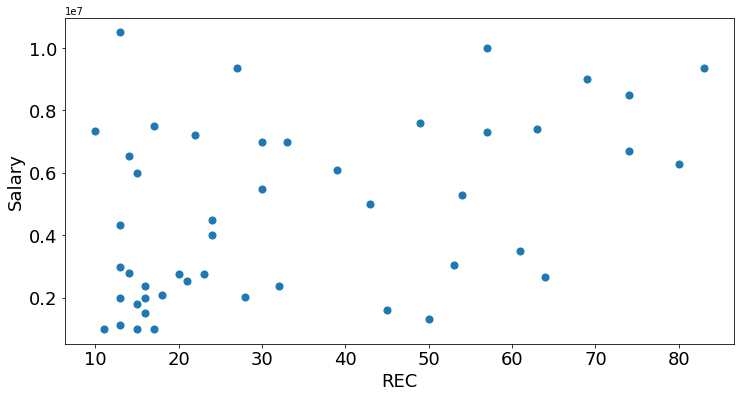

In [5]:
ax = tes.plot(kind="scatter", x = 'REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.79525425e-16, -4.72435330e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.70839595,  1.06075189],
       [-0.72693157, -0.84638002],
       [ 1.66068814,  1.19965541],
       [ 0.96444387, -0.81799116],
       [ 0.3496791 ,  0.48904964]])

In [11]:
km.predict(X)

array([2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 3, 3, 4, 3, 4, 4, 4, 1, 4, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,REC,REC_rank,salary,clusters
0,Travis Kelce,83,1.0,9368400,2
1,Jack Doyle,80,2.0,6300000,2
2,Delanie Walker,74,3.5,6687500,2
3,Zach Ertz,74,3.5,8500000,2
4,Rob Gronkowski,69,5.0,9000000,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.85000000e+01, 7.68125000e+06],
       [1.81000000e+01, 2.35078670e+06],
       [6.96250000e+01, 8.06948750e+06],
       [5.46000000e+01, 2.43013400e+06],
       [4.13333333e+01, 6.08333333e+06]])

In [14]:
tes.groupby('clusters')[['REC', 'salary']].mean()

,REC,salary
clusters,,
0,18.500000,7.681250e+06
1,18.100000,2.350787e+06
2,69.625000,8.069488e+06
3,54.600000,2.430134e+06
4,41.333333,6.083333e+06


In [15]:
centroids = tes.groupby('clusters')[['REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

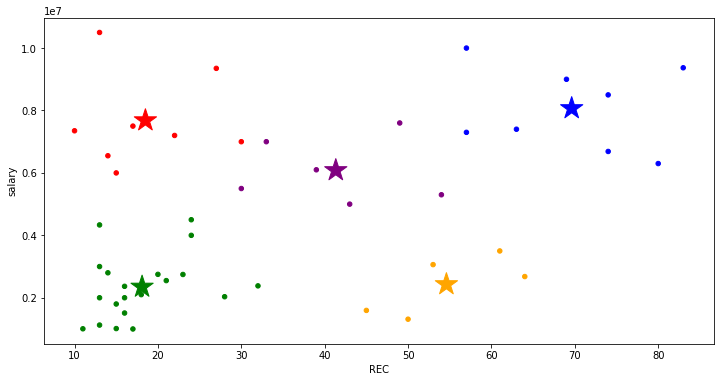

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'REC', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

12.346628360716368

In [18]:
silhouette_score(X, km.labels_)

0.4935190394261694